In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as graph
%matplotlib inline 
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams['font.family'] = 'DejaVu Sans'
graph.rcParams['font.size'] = '16'
graph.rcParams['image.cmap'] = 'rainbow'
import pandas as pd


###
# REPLACE <addFilePath> BELOW WITH 'Data/football data.txt' (INCLUDING THE QUOTES) TO LOAD THE DATA FROM THAT FILE
###
dataset = pd.read_csv('Data/football data.txt', index_col= False, sep='\t', header=0)

###
# REPLACE <printDataHere> BELOW WITH print(dataset.head()) TO PREVIEW OUR DATASET
###
print(dataset.head())

   average_goals_per_match  won_competition
0                 2.422870                1
1                 2.824478                1
2                 0.571688                0
3                 1.055028                0
4                 0.394192                0


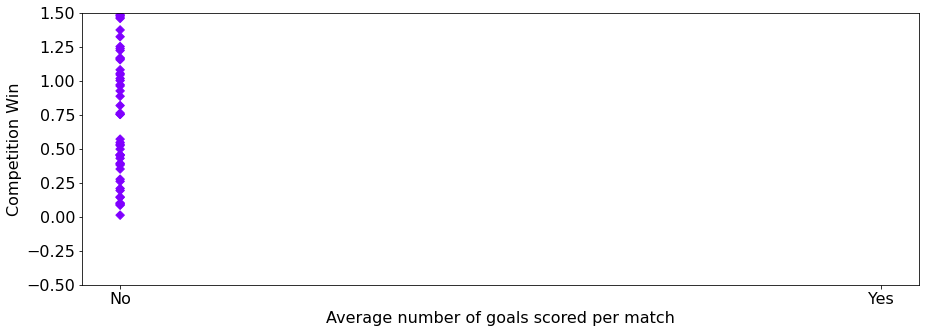

In [3]:
###
# REPLACE <addWonCompetition> BELOW WITH 'won_competition' (INCLUDING THE QUOTES)
###
train_y = dataset['won_competition']
###
# REPLACE <addAverageGoals> BELOW WITH 'average_goals_per_match' (INCLUDING THE QUOTES)
###
train_x = dataset['average_goals_per_match']

# The 'won_competition' will be displayed on the vertical axis (y axis)
# The 'average_goals_per_match' will be displayed on the horizontal axis (x axis)
graph.scatter(train_y,train_x, c=train_y, marker='D')

graph.xticks([0,1],['No','Yes'])
graph.ylabel('Competition Win')
graph.ylim([-0.5,1.5])
graph.xlabel("Average number of goals scored per match")

graph.show()

In [6]:
import numpy as np
from sklearn import linear_model
# Here we build a logistic regression model
###
# REPLACE <buildLinearRegression> BELOW WITH linear_model.LogisticRegression() TO BUILD A LOGISTIC REGRESSION MODEL
###
clf = linear_model.LogisticRegression()
# This step fits (calculates) the model
# We are using our feature (x - number of goals scored) and our outcome/label (y - won/lost)
clf.fit(train_x[:, np.newaxis], train_y)

#this work out the loss
def sigmoid(train_x):
    return 1/(1+np.exp(-train_x))
X_test = np.linspace(0,3,300)
loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()


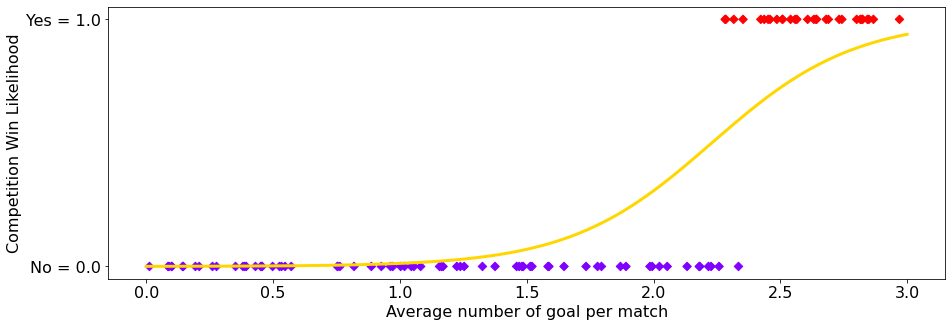

In [7]:
#this makes the graph
# the data points 
graph.scatter(train_x, train_y, c=train_y, marker='D')
#the curve
graph.plot(X_test, loss, color='gold',linewidth=3)
#Define the y-axis 
graph.yticks([0,1],['No = 0.0', 'Yes = 1.0'])
graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goal per match")
graph.show()

Probability of winning this year
17.79132955560008%


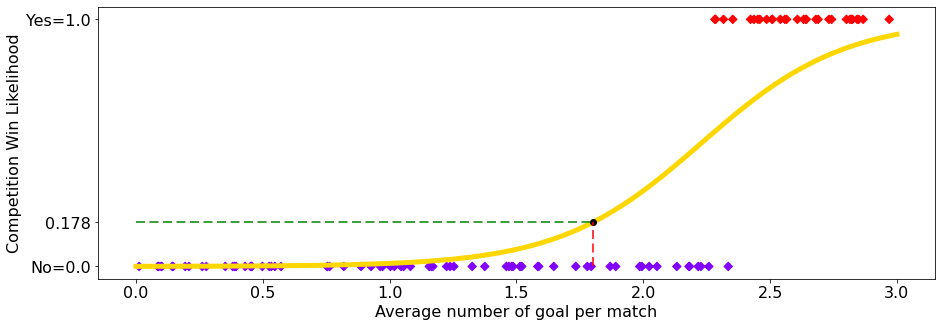

In [8]:
###
# REPLACE <numberOfGoals> BELOW WITH THE NUMBER OF GOALS IN A MATCH THIS YEAR. USE ANY NUMBER FROM 0 TO 3
###
p = 1.8
# Next we're going to use our model again - clf is the name of our model.
# We'll use a method to predict the probability of a positive result
# Use the variable p which we just made in this method.
###
# REPLACE <replaceWithP> BELOW WITH p TO PREDICT USING THIS VALUE
###
probOtWinning = clf.predict_proba([[p]])[0][1]

#this prints out the result
print("Probability of winning this year")
print(str(probOtWinning*100)+ "%")

#this plot the result 
graph.scatter(train_x,train_y, c=train_y, marker='D')
graph.yticks([0,probOtWinning,1], ['No=0.0',round(probOtWinning,3),'Yes=1.0'])
graph.plot(X_test, loss, color='gold', linewidth=5)

graph.plot(p,probOtWinning,'ko')#result point
graph.plot(np.linspace(0,p,2), np.full([2],probOtWinning), dashes=[6,3],color='green')#dashed lines(to y-axis)
graph.plot(np.full([2],p),np.linspace(0,probOtWinning,2), dashes=[6,3],color='red')#dashed lines(to x-axis)

graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goal per match")
graph.show()

Probability of Winning this year
100.0 %


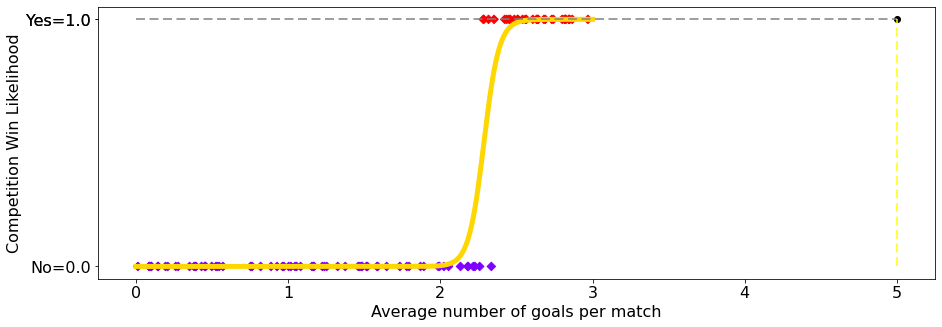

In [11]:
# Let's do that again.
# We will repeat what we did in step 3, but change the decision boundary
import numpy as np
from sklearn import linear_model
###
# REPLACE THE <numberOfGoals> WITH THE NUMBER OF GOALS YOU WANT TO EVALUATE
###
p = 5
# Here we build the new logistic regression model.
# The C=200 is where we change the decision boundary.
###
# REPLACE <buildLinearRegression> BELOW WITH linear_model.LogisticRegression(C=200) TO BUILD A LOGISTIC REGRESSION MODEL
###
clf = linear_model.LogisticRegression(C=200)
# This step fits (calculates) the model
# We are using our feature (x - number of goals scored) and our outcome/label (y - won/lost)
clf.fit(train_x[:, np.newaxis], train_y)

#this works out the loss
def sigmoid(train_x):
    return 1/(1+np.exp(-train_x))
X_test = np.linspace(0,3,300)
loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()

#this make the prediction for your chosen number of goal
probOfWinning = clf.predict_proba([[p]])[0][1]

#this prints out the result.
print("Probability of Winning this year")
print(str(probOfWinning*100),"%")

#this plot the result 
graph.scatter(train_x,train_y, c=train_y, marker='D')
graph.yticks([0, probOfWinning,1], ['No=0.0',round(probOfWinning,3),'Yes=1.0'])
graph.plot(X_test, loss, color='gold', linewidth=5)

graph.plot(p,probOfWinning,'ko')#result point
graph.plot(np.linspace(0,p,2), np.full([2],probOfWinning),dashes=[6,3], color='gray')#dashed lines(to y-axis)
graph.plot(np.full([2],p),np.linspace(0,probOfWinning,2),dashes=[6,3], color='yellow')#dashes lines(to x-axis)

#make the graph
graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()